In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy.random as rng
import numpy as np
import kontin as con
import danframe as dan
import testwin as tw
pl.rcParams["figure.figsize"] = (10,6) # Bigger figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data and generating automatic windows in the 6405 Å window

In [10]:
fil2 = "local_data/6405_aS1_397_cor.fits"
spec2 = dan.danframe_sac(fil2)
wins = tw.gen_all_auto_wins(spec2)
wins = tw.gen_man_win(spec2,wins)

### Examining distribution of refrence and mean

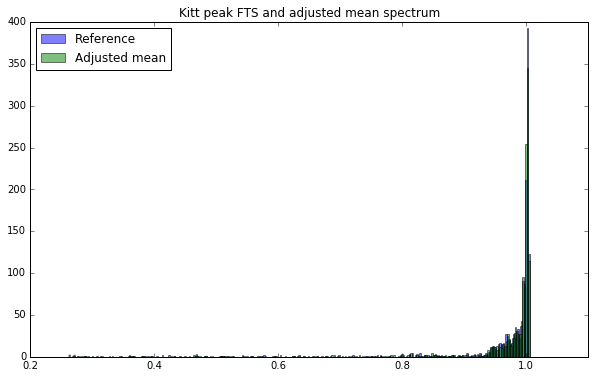

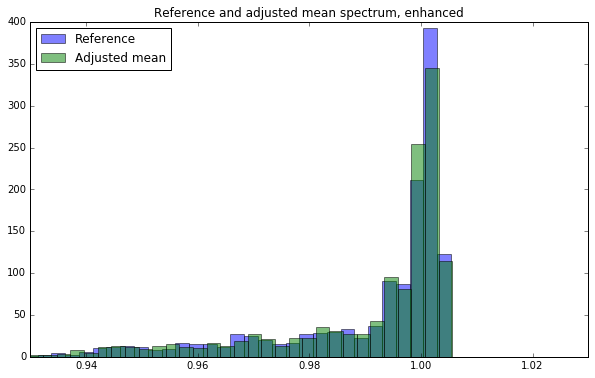

In [11]:
pl.hist(spec2.ref ,301,alpha=0.5,label="Reference")
pl.hist(spec2.mean,301,alpha=0.5,label="Adjusted mean")
pl.title("Kitt peak FTS and adjusted mean spectrum")
pl.legend(loc="upper left")
pl.show()

pl.hist(spec2.ref ,301,alpha=0.5,label="Reference")
pl.hist(spec2.mean,301,alpha=0.5,label="Adjusted mean")

pl.title("Reference and adjusted mean spectrum, enhanced")
pl.xlim(0.93,1.03)
pl.legend(loc="upper left")
pl.show()

### The same distribution, but for some randomly chosen rows in the data spectrum

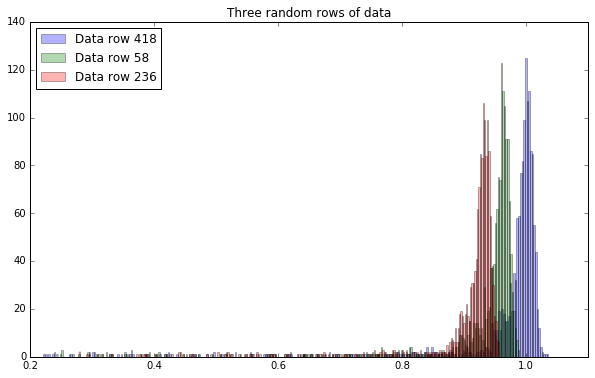

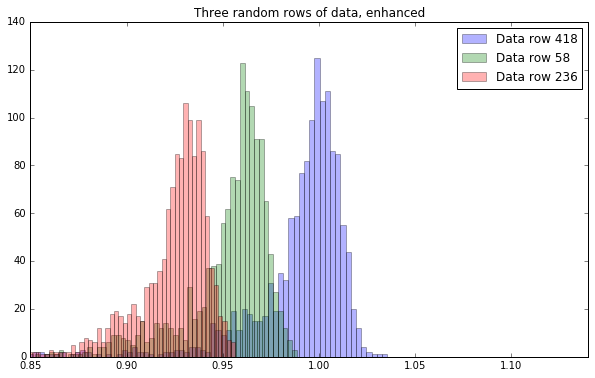

In [12]:
row1 = rng.choice(800)
row2 = rng.choice(800)
row3 = rng.choice(800)
pl.hist(spec2.spec(row1) ,301,alpha=0.3,label="Data row {}".format(row1))
pl.hist(spec2.spec(row2) ,301,alpha=0.3,label="Data row {}".format(row2))
pl.hist(spec2.spec(row3) ,301,alpha=0.3,label="Data row {}".format(row3))
pl.title("Three random rows of data")
pl.legend(loc="upper left")
pl.show()

pl.hist(spec2.spec(row1) ,301,alpha=0.3,label="Data row {}".format(row1))
pl.hist(spec2.spec(row2) ,301,alpha=0.3,label="Data row {}".format(row2))
pl.hist(spec2.spec(row3) ,301,alpha=0.3,label="Data row {}".format(row3))
pl.title("Three random rows of data, enhanced")
pl.legend(loc="upper right")
pl.xlim(0.85,1.14)
pl.show()

### Extra look at the first and last rows

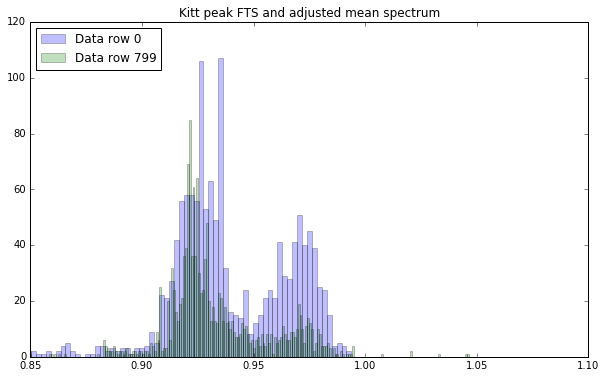

In [13]:
pl.hist(spec2.spec(0) ,301,alpha=0.25,label="Data row {}".format(0))
#pl.hist(spec2.spec(1) ,301,alpha=0.25,label="Data row {}".format(1))
#pl.hist(spec2.spec(798) ,301,alpha=0.25,label="Data row {}".format(798))
pl.hist(spec2.spec(799) ,301,alpha=0.25,label="Data row {}".format(799))
pl.title("Kitt peak FTS and adjusted mean spectrum")
pl.legend(loc="upper left")
pl.xlim(0.85,1.10)
pl.show()

### Conclusions
Top and bottom rows should be excluded in the analysis for sure. More proper spectrums should be very heavily clustered around 1. 

## Line shapes

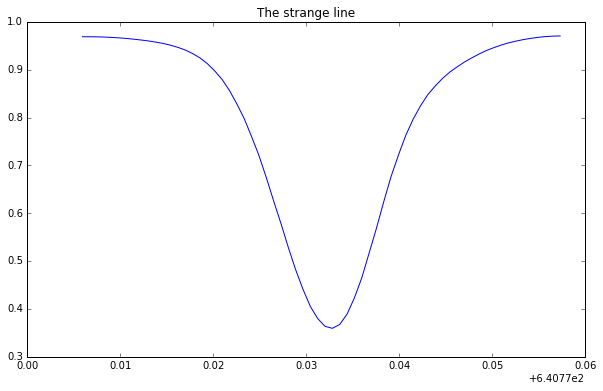

In [14]:
idx1 = np.array( con.make_idx_from_windows([spec2.pkwindows[1]]))
ridx = ridx1 = idx1[ spec2.ref[idx1] < 1]
pl.plot(spec2.lmbd[idx1],spec2.ref[idx1])
pl.title("The strange line")
pl.show()